In [1]:
from numpy import *
from matplotlib.pyplot import*

import pandas as pd
import scipy as sp
import sklearn as sl

import seaborn as sns; sns.set()
import matplotlib as mpl
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from scipy.interpolate import *
%matplotlib inline

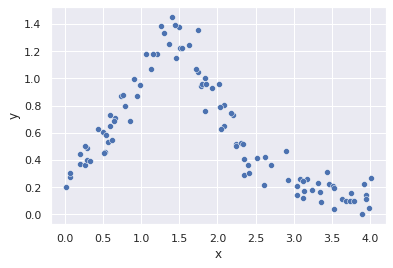

,x,y
0,0.065859,0.277413
1,0.020931,0.202239
2,0.070312,0.307369
3,0.206166,0.367530
4,0.286572,0.491144
...,...,...
95,3.922613,0.225565
96,3.898473,0.000000
97,3.952111,0.141005
98,3.939211,0.115500


In [6]:
df = pd.read_pickle('ex1.gz')
sns.scatterplot(x='x',y='y',data=df)
plt.show()
df

(A) Pendiente e intercepto
Determine la pendiente de los datos en el intervalo $[0,1.5]$ y el valor del intercepto con el eje $y$. Es decir, $f(0)=?$. ¿Cuál es el valor de $r^2$?


In [20]:
x = df["x"]
y = df["y"]
x1 = []
y1=[]
for i in range(len(x)):
    if(x[i]<=1.5):
        x1.append(x[i])
        y1.append(y[i])
def func(x, m, b):
    return m*x+b
pre = []

    
x2 = np.array(x1)
y2 = np.array(y1)
popt, pcov = curve_fit(func, x1, y1)
for i in range(len(x1)):
    pre.append(func(x1[i],popt[0],popt[1]))
print(f"La pendiente de los datos en el intervalo establecido es de: {popt[0]}.")
print(f"El intercepto con el eje y es de: {popt[1]}. ")
r2 = r2_score(pre,y1)
print(f"El valor de R2 es de {r2}")


La pendiente de los datos en el intervalo establecido es de: 0.8163869624029936.
El intercepto con el eje y es de: 0.18270690829168224. 
El valor de R2 es de 0.9266258916532397


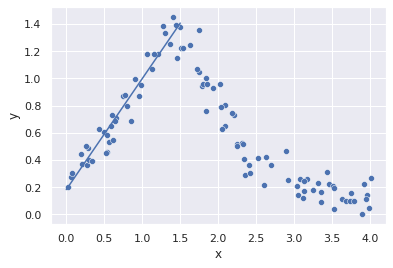

In [9]:
sns.scatterplot(x='x',y='y',data=df)
x_tmp = np.linspace(0,1.5,3)
plt.plot(x_tmp, popt[1]+popt[0]*x_tmp)

(B) Regresión polinomial
Suponga que quiere realizar la siguiente regresión polinomial,$$y=\beta_1+\beta_2x+\beta_2x^2+\beta_2x^3+\beta_2x^4+\beta_2x^5.$$Plantee la función de costo que le permita calcular los coeficientes y calcule $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. ¿Cuál es el $r^2$?

Calcule $f(0)$ y compare con los resultados anteriores

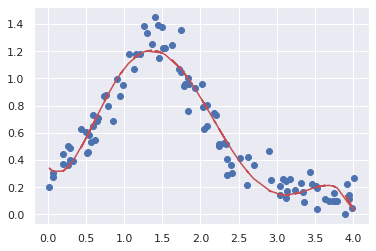

In [11]:
x3 = np.array(x)
y3 = np.array(y)
p1=polyfit(x3,y3, 5)
plot(x3, y3, "o")
plot(x3, polyval(p1,x),"r-")


In [12]:
#Para crear la matriz A se utilizaron los valores dados y se agregaron a dicha matriz 
A = []
for i in range(len(x)):
    A.append([1,x[i],x[i]**2,x[i]**3,x[i]**4,x[i]**5])
A1=np.matrix(A)
B=np.array([y]).reshape(-1,1)
B1 = np.matrix(B)

# Definamos la func de costo (debe devolver un escalar)
def L(x,A,b):
    # (b_pred-b_obs)^2
    # m es el numero de datos
    # n es el numero de parametros == 13
    m,n = A.shape
    X = np.matrix(x).T
    DeltaB=(A*X-b) # b gorro - b
    return (DeltaB.T*DeltaB)[0,0]/m # matriz 1x1

res1 = sp.optimize.minimize(fun=L,x0=np.zeros(A1.shape[1]), args = (A1,B1), tol=1e-10)


print("Las variables requeridas son presentadas a continuación con su respectivo orden", res1["x"])
print("De la misma forma, decimos entonces que f(0) es el intercepto, es decir, B_0, que es: ", res1["x"][0])
def func(x,a,b,c,d,e,f):
    return a + b*x + c*x**2 + d*x**3 + e*x**4 + f*x**5
va = np.linspace(0,4,100)
predicc = np.array(va)
info = func(predicc,res1["x"][0],res1["x"][1],res1["x"][2],res1["x"][3],res1["x"][4],res1["x"][5])
r_2 = r2_score(info, y)
print(f"R2 es {r_2}")

Las variables requeridas son presentadas a continuación con su respectivo orden [ 0.35735885 -0.84261037  3.78479915 -3.00339487  0.85844678 -0.08305837]
De la misma forma, decimos entonces que f(0) es el intercepto, es decir, B_0, que es:  0.35735884671500046
R2 es 0.9067707726944936


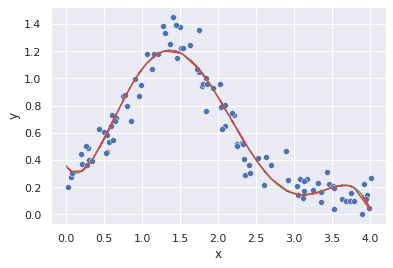

In [19]:
sns.scatterplot(x='x',y='y',data=df)
x_tmp = np.linspace(0,4,1000)
plt.plot(x_tmp,func(x_tmp,*res1['x']),'g-')
plot(x3, polyval(p1,x),"r-")

(C) Regresión polinomial exacta
Resulta, que cuando se quiere hacer alguna regresión polinomial esta se puede hacer de forma exacta. ¿Cómo? Suponga que ud va a considerar que su problema en lugar de tener $1$ variable ($x$) tiene $n+1$, siendo $n$ el orden del polinomio a ajustar. Es decir, sus nuevas variables van a ser $\{x_0,\,x_1,\,x_2,\,x_3,\dots,\,x_n\}$ definiendo $x_j=x^j$. Así pues, siguiendo el mismo procedimiento para la regresión lineal multidimensional que realizamos para el ejercicio de datos inmobiliarios, puede encontrar los valores de los coeficientes $\beta_1$, $\beta_2$, $\beta_3$, $\beta_4$, y $\beta_5$. Encuentre estos valores y compare con los resultados en la sección (B).

Calcule $f(0)$ y compare con los resultados anteriores.

Si ud se pregunta si esto es posible la respuesta es sí. Inclusive, esto se puede extender a cualquier a cualquier conjunto de funciones, tal que $x_j=f_j(x)$, que represente un conjunto "linealmente independiente" (¡Me estoy adelantando a Fourier!). Para quienes quieran explorar algunas curiosidades matemáticas, cuando $n+1$ es igual al número de puntos o valores de $x$ (y todos diferentes) la matriz es siempre invertible y resulta ser la inversa de una matriz de Vandermonde.

In [100]:
x4=np.array(x).reshape(-1,1)
y4=np.array(y)

C =  np.array([np.ones([len(x), 1]),x4 ,x4**2, x4**3, x4**4, x4**5]).reshape(6, len(x)).T

val = np.linalg.inv(C.T @ C) @ C.T @ y

#info_y = func(va,val[0],val[1],val[2],val[3],val[4],val[5])
print("Las variables requeridas son presentadas a continuación con su respectivo orden", val)
print("De la misma forma, decimos entonces que f(0) es el intercepto, es decir, B_0, que es: ", val[0])
print("Ambos modelos resultan en resultados casi iguales, con diferencias muy pequeñas.")

Las variables requeridas son presentadas a continuación con su respectivo orden [ 0.35644669 -0.83588269  3.77276401 -2.99526012  0.85614705 -0.08282854]
De la misma forma, decimos entonces que f(0) es el intercepto, es decir, B_0, que es:  0.3564466850007825
Ambos modelos resultan en resultados casi iguales, con diferencias muy pequeñas.


(D) Regresión a un modelo teórico
Suponga que su modelo teórico es el siguiente:$$y=\frac{a}{\left[(x-b)^2+c\right]^\gamma}.$$Halle $a$, $b$, $c$ y $\gamma$.

Calcule $f(0)$ y compare con los resultados anteriores

[0.68740953 1.39239335 0.49566101 0.93665782]
La pendiente de los datos f(o) en el intervalo establecido es de: 0.298741208360876.
Los valores a,b,c y gamma son respectivamente:0.6874095282347863, 1.3923933451577877, 0.49566101229084286, 0.9366578217722269
El r cuadrado es 0.944788980615329
El r cuadrado nos indica cómo éste modelo es superior a los demás, sin embargo podría tratarse con un defecto de la función utilizada para detectar dicho r cuadrado, por lo que no es definitivo que este modelo sea mejor que los anteriores.


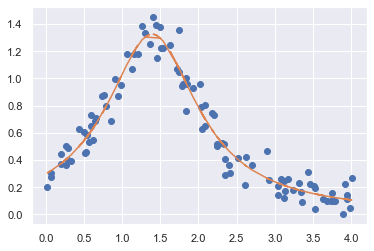

In [101]:
x = df["x"]
y = df["y"]
def func2(x,a,b,c,g):
    return a/((c+(x-b)**2)**g)

    
x4 = np.array(x)
y4 = np.array(y)
popt, pcov = curve_fit(func2, x4, y4)
plot(x4,y4,"o")
plot(x4,func2(x4,popt[0],popt[1],popt[2],popt[3]))
r_c =r2_score(func2(x4,popt[0],popt[1],popt[2],popt[3]),y4)
print(f"{popt}")
print(f"La pendiente de los datos f(o) en el intervalo establecido es de: {func2(0,popt[0],popt[1],popt[2],popt[3])}.")
print(f"Los valores a,b,c y gamma son respectivamente:{popt[0]}, {popt[1]}, {popt[2]}, {popt[3]}")
print(f"El r cuadrado es {r_c}")
print("El r cuadrado nos indica cómo éste modelo es superior a los demás, sin embargo podría tratarse con un defecto de la función utilizada para detectar dicho r cuadrado, por lo que no es definitivo que este modelo sea mejor que los anteriores.")

In [23]:
x = df["x"]
y = df["y"]
L = np.max(x) - np.min(x)

#Para crear la matriz A se utilizaron los valores dados y se agregaron a dicha matriz 
A = []
for i in range(len(x)):
    A.append([
        1, # a
        np.cos((2*np.pi/L)*x[i]), # b
        np.sin((2*np.pi/L)*x[i]), # c
        np.cos((2*np.pi/L)*2*x[i]), # d
        np.sin((2*np.pi/L)*2*x[i]), # e
        np.cos((2*np.pi/L)*3*x[i]), # f
        np.sin((2*np.pi/L)*3*x[i]), # g
        np.cos((2*np.pi/L)*4*x[i]), # h
        np.sin((2*np.pi/L)*4*x[i]), # i
        np.cos((2*np.pi/L)*5*x[i]), # j
        np.sin((2*np.pi/L)*5*x[i]), # k
    ])
A1=np.matrix(A)
B=np.array([y]).reshape(-1,1)
B1 = np.matrix(B)

# Definamos la func de costo (debe devolver un escalar)
def Lf(x,A,b):
    # (b_pred-b_obs)^2
    # m es el numero de datos
    # n es el numero de parametros == 13
    m,n = A.shape
    X = np.matrix(x).T
    DeltaB=(A*X-b) # b gorro - b
    return (DeltaB.T*DeltaB)[0,0]/m # matriz 1x1

res1 = sp.optimize.minimize(fun=Lf,x0=np.zeros(A1.shape[1]), args = (A1,B1), tol=1e-10)


print("Las variables requeridas son presentadas a continuación con su respectivo orden", res1["x"])
print("De la misma forma, decimos entonces que f(0) es el intercepto, es decir, B_0, que es: ", res1["x"][0])
def func(x,a,b,c,d,e,f,g,h,i,j,k):
    global L
    return (
        a
        + b*np.cos((2*np.pi/L)*x) 
        + c*np.sin((2*np.pi/L)*x)
        + d*np.cos((2*np.pi/L)*2*x) 
        + e*np.sin((2*np.pi/L)*2*x)
        + f*np.cos((2*np.pi/L)*3*x) 
        + g*np.sin((2*np.pi/L)*3*x)
        + h*np.cos((2*np.pi/L)*4*x) 
        + i*np.sin((2*np.pi/L)*4*x)
        + j*np.cos((2*np.pi/L)*5*x) 
        + k*np.sin((2*np.pi/L)*5*x)
    )
predicc = func(x,*res1['x'])
r_2 = r2_score(predicc, y)
print(f"R2 es {r_2}")

Las variables requeridas son presentadas a continuación con su respectivo orden [ 0.58417441 -0.3227938   0.42526524 -0.06607314 -0.12300826  0.02359048
  0.0482006  -0.01341437  0.02358437 -0.02635918 -0.00180222]
De la misma forma, decimos entonces que f(0) es el intercepto, es decir, B_0, que es:  0.584174414128569
R2 es 0.9473698026582649


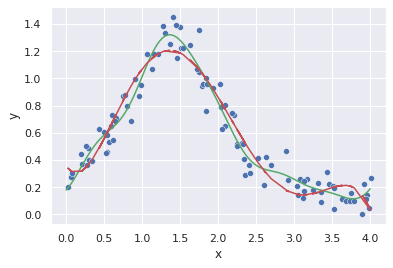

In [24]:
sns.scatterplot(x='x',y='y',data=df)
x_tmp = np.linspace(0,4,1000)
plt.plot(x_tmp,func(x_tmp,*res1['x']),'g-')
plot(x3, polyval(p1,x),"r-")